<a href="https://colab.research.google.com/github/olsonjl1986/university-of--austin-texas/blob/main/handsonTSNE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

# Removes the limit from the number of displayed columns
pd.set_option("display.max_columns", None)
# Changes the limit of number of displayed rows to 200
pd.set_option("display.max_rows", 200)

In [2]:
from google.colab import files
import io

try:
    uploaded
except NameError:
    uploaded = files.upload()

data = pd.read_csv(io.BytesIO(uploaded['auto-mpg.csv']))
# for Jupyter Notebook IDE, the previous code lines can be commented out
# and only the next line can be uncommented and run
#data = pd.read_csv("auto-mpg.csv")
data.shape

Saving auto-mpg.csv to auto-mpg.csv


(398, 9)

In [3]:
data.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [5]:
#dropping car_nbame and origin
cData = data.copy()
cData = cData.drop(["car name","origin"], axis = 1)
cData.head()

,mpg,cyl,disp,hp,wt,acc,yr
0,18.0,8,307.0,130,3504,12.0,70
1,15.0,8,350.0,165,3693,11.5,70
2,18.0,8,318.0,150,3436,11.0,70
3,16.0,8,304.0,150,3433,12.0,70
4,17.0,8,302.0,140,3449,10.5,70


In [6]:
cData.columns = ["mpg","cylinders","displacement","horsepower","weight","acceleration","model year"]

cData.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year'],
      dtype='object')

In [8]:
# dealing with missing vlaues

# is digit on "horsepoweer"
hpisdigit = pd.DataFrame(cData.horsepower.str.isdigit())   # if string is made of digits store true or false

# print is digit true or false

cData[hpisdigit["horsepower"] == False] # from temp take only the rows that are false


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
32,25.0,4,98.0,?,2046,19.0,71
126,21.0,6,200.0,?,2875,17.0,74
330,40.9,4,85.0,?,1835,17.3,80
336,23.6,4,140.0,?,2905,14.3,80
354,34.5,4,100.0,?,2320,15.8,81
374,23.0,4,151.0,?,3035,20.5,82


In [9]:
# replace ? with np.nan 
cData = cData.replace("?", np.nan)


In [10]:
# look for median values in columns \

cData.median()

mpg               23.0
cylinders          4.0
displacement     148.5
horsepower        93.5
weight          2803.5
acceleration      15.5
model year        76.0
dtype: float64

In [12]:
# define func to replace np.nan with median values 

medianfiller = lambda x : x.fillna(x.median())
cData.apply(medianfiller,axis =0)

# apply float to horsepower 

cData["horsepower"] = cData.horsepower.astype("float64")

In [20]:
cData.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [21]:
cData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 21.9 KB


,cylinders,displacement,horsepower,weight,acceleration,model year
0,1.498191,1.090604,NaN,0.630870,-1.295498,-1.627426
1,1.498191,1.503514,NaN,0.854333,-1.477038,-1.627426
2,1.498191,1.196232,NaN,0.550470,-1.658577,-1.627426
3,1.498191,1.061796,NaN,0.546923,-1.295498,-1.627426
4,1.498191,1.042591,NaN,0.565841,-1.840117,-1.627426


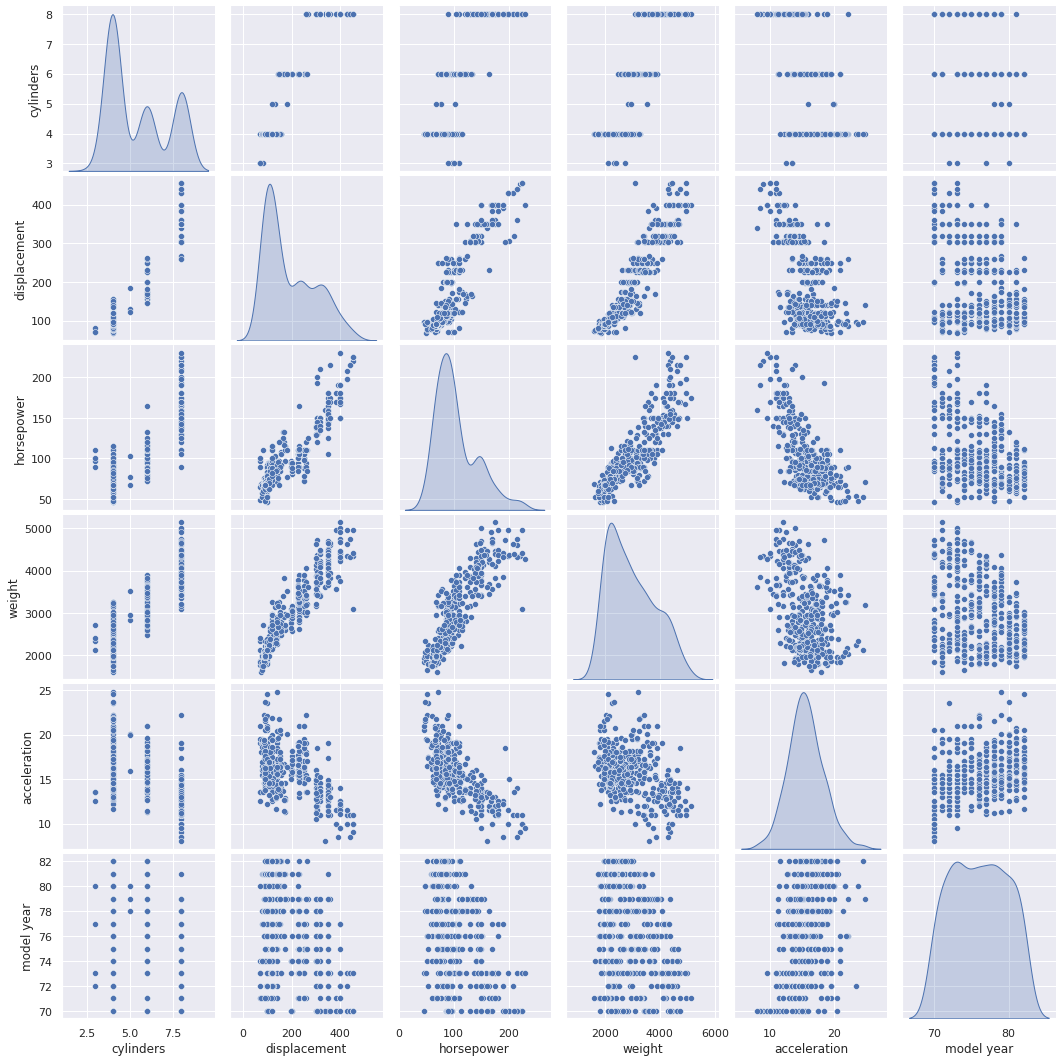

In [15]:
# bivariate plots

# inde variabvle
df = cData.drop(["mpg"], axis = 1)
# dep variable 
y = cData[["mpg"]]

sns.pairplot(df, diag_kind = "kde")





In [16]:
# scaling the data

from scipy.stats import zscore
X = df.apply(zscore)
X.head()

,cylinders,displacement,horsepower,weight,acceleration,model year
0,1.498191,1.090604,NaN,0.630870,-1.295498,-1.627426
1,1.498191,1.503514,NaN,0.854333,-1.477038,-1.627426
2,1.498191,1.196232,NaN,0.550470,-1.658577,-1.627426
3,1.498191,1.061796,NaN,0.546923,-1.295498,-1.627426
4,1.498191,1.042591,NaN,0.565841,-1.840117,-1.627426


In [19]:
X.describe()

,cylinders,displacement,horsepower,weight,acceleration,model year
count,3.980000e+02,3.980000e+02,0.0,3.980000e+02,3.980000e+02,3.980000e+02
mean,-5.171742e-16,-8.312725e-17,NaN,-9.902743e-17,8.982206e-17,-8.837152e-16
std,1.001259e+00,1.001259e+00,NaN,1.001259e+00,1.001259e+00,1.001259e+00
min,-1.444949e+00,-1.204411e+00,NaN,-1.604943e+00,-2.747814e+00,-1.627426e+00
25%,-8.563206e-01,-8.563178e-01,NaN,-8.828266e-01,-6.328794e-01,-8.150739e-01
50%,-8.563206e-01,-4.314040e-01,NaN,-1.973624e-01,-2.472221e-02,-2.721449e-03
75%,1.498191e+00,6.584879e-01,NaN,7.538337e-01,5.834349e-01,8.096310e-01
max,1.498191e+00,2.511784e+00,NaN,2.565185e+00,3.351912e+00,1.621983e+00


In [18]:
# applying the t-sne technique

# transforming 6 dim to 2 dim 

from sklearn.manifold import TSNE
tsne = TSNE(n_components = 2, random_state =8)
X_reduced = tsne.fit_transform(X)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


ValueError: ignored